데이콘 타이타닉: https://dacon.io/competitions/open/235539/overview/description

In [1]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델 불러오기
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무 모델 불러오기

In [4]:
 # 데이터 불러오기
train = pd.read_csv('C:/Users/user/Downloads/타이타닉/train.csv')# 모델 학습 파일
test = pd.read_csv('C:/Users/user/Downloads/타이타닉/test.csv')# 모델 시험지 파일
submission = pd.read_csv('C:/Users/user/Downloads/타이타닉/submission.csv') #답안지 파일 

In [5]:
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


PassengerId : 탑승객의 고유 아이디  
Survival : 생존여부(0: 사망, 1: 생존)   
Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)  
Name : 이름  
Sex : 성별  
Age : 나이  
Sibsp : 함께 탑승한 형제자매, 아내 남편의 수  
Parch: 함께 탑승한 부모, 자식의 수  
Ticket: 티켓번호  
Fare: 티켓의 요금  
Cabin: 객실번호  
Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)  

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


pd.Series.value_counts()  
series 내 고유값들 각각의 개수를 보여주는 함수  
가장 많이 나오는 고유값들 순서로 보여줍니다.  
비어 있는 값은 고려하지 않습니다.  

In [7]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

pd.Series.unique()  
해당 series의 고유값들만 보여주는 함수  
[1, 1, 1, 3] 이라는 시리즈가 있다면, unique() 함수 적용시 [1, 3]이 출력됩니다.  
nan 값이 있을시 nan값도 포함하여 출력한다 (Not a Number)  
출현하는 순서대로 나오기 때문에, 알파벳 순서 또는 오름차순으로 정렬되어 있지 않습니다.  

In [9]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [11]:
train[['Pclass', 'Fare']].groupby('Pclass').mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


pd.DataFrame.groupby()  
집단에 대한 통계량 확인

In [13]:
train.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


pd.Series.plot(kind = "bar")   
막대 그래프  
index 값이 x축, value값이 y축으로 대응 됩니다.  
value_counts()의 결과물을 보여줄 때 유용합니다.  
groupby된 결과물을 보여줄 때 유용합니다  

<AxesSubplot:xlabel='Pclass'>

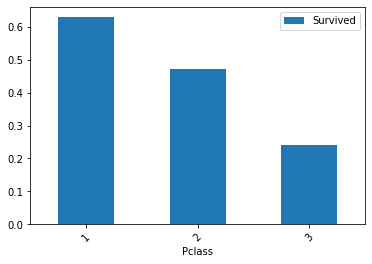

In [14]:
train[['Pclass', 'Survived']].groupby('Pclass').mean().plot(kind = "bar", rot = 45)

pd.Series.plot(kind = 'hist')  
히스토그램: 구간별로 속해있는 row의 개수를 시각화 합니다.  
수치형에서만 가능, 범주는 안됩니다!  

<AxesSubplot:ylabel='Frequency'>

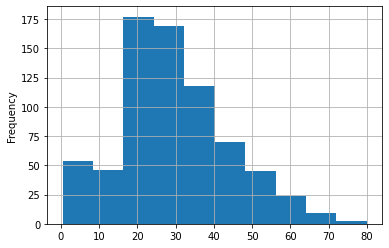

In [16]:
train['Age'].plot(kind = 'hist', bins = 10, grid = True)

pd.DataFrame.plot(x, y, kind = 'scatter')  
산점도: 두 변수간의 관계를 시각화  

<AxesSubplot:xlabel='Age', ylabel='Survived'>

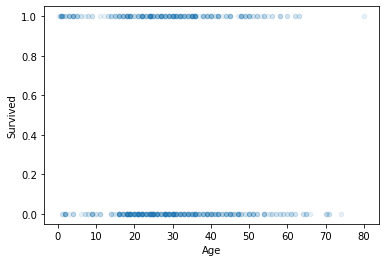

In [17]:
train.plot('Age', 'Survived', kind = 'scatter', alpha = 0.1)

pd.Series.isna()    
결측치 여부를 확인해줍니다.  
결측치면 True, 아니면 False

In [19]:
train.isna().sum() / 891

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

pd.DataFrame.fillna()  
결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.  
범주형 변수일 경우, 최빈값으로 대체할 수 있습니다.

In [21]:
train['Age'] = train['Age'].fillna(value = train['Age'].mean())

In [22]:
train['Age'].isna().sum()

0

In [23]:
train['Embarked'].fillna(value = 'S', inplace = True)

In [24]:
train['Embarked'].isna().sum()

0

In [25]:
test['Age'].fillna(value = train['Age'].mean(), inplace = True)

<AxesSubplot:ylabel='Frequency'>

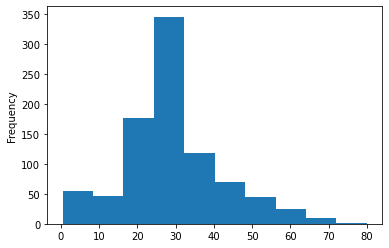

In [26]:
train['Age'].plot(kind = 'hist')

pd.Series.map()  
시리즈 내 값을 변환 할 때 사용하는 함수  

In [27]:
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

In [28]:
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

sklearn.linear_model.LogisticRegression()  
로지스틱 회귀 모형  
0과 1사이의 값을 산출


In [29]:
X_train = train[['Pclass', 'Age']]
y_train = train['Survived']
X_test = test[['Pclass', 'Age']]

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

In [33]:
submission['Survived'] = y_pred

In [34]:
submission.to_csv('lr_model_Pclass_Age.csv', index = False)

sklearn.tree.DecisionTreeClassifier()  
의사결정 나무 모델


특징변수들로부터 타깃변수를 맞추기 위해 경우를 쪼개나가는 알고리즘입니다.

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [36]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
submission['Survived'] = dt_model.predict(X_test)

In [38]:
submission.to_csv('dt_model.csv', index = False)

model.fit()  
모델 학습  

model.predict()  
모델 예측  

model.predict_proba()  
모델 예측

In [39]:
submission['Survived'] = model.predict_proba(X_test)[:,1]

In [40]:
submission.to_csv('lr_proba.csv', index = False)

In [42]:
submission['Survived'] = dt_model.predict_proba(X_test)[:,1]

In [43]:
submission.to_csv('dt_proba.csv', index = False)

In [44]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [45]:
dt_model_new = DecisionTreeClassifier(min_samples_split=10)

In [46]:
dt_model_new.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=10)

In [47]:
submission['Survived'] = dt_model_new.predict_proba(X_test)[:, 1]

In [48]:
submission.to_csv('dt_min_samples_10_proba.csv', index = False)

In [49]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,C


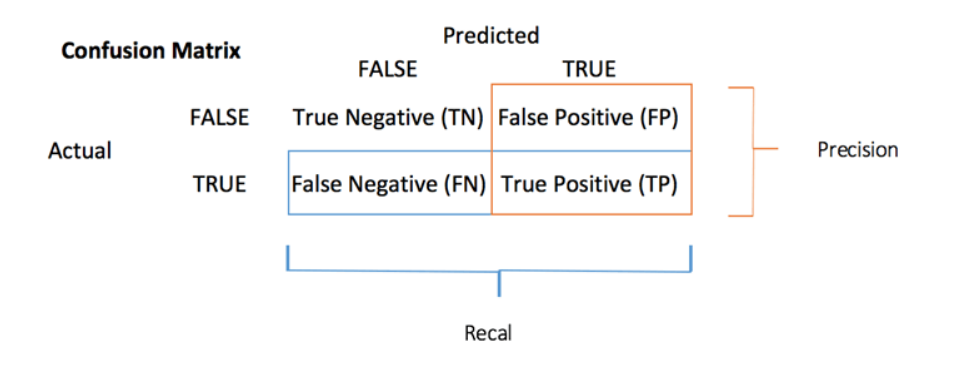

In [50]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [51]:
X_train = train[['Pclass', 'Age']]
y_train = train['Survived']
X_test = test[['Pclass', 'Age']]

In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [53]:
y_true = y_train.values

In [54]:
cf_matrix = confusion_matrix(y_true, y_pred)

In [55]:
cf_matrix

array([[466,  83],
       [182, 160]], dtype=int64)

In [56]:
accuracy_score(y_true, y_pred)

0.7025813692480359

In [57]:
(cf_matrix[0,0] + cf_matrix[1,1]) / 891

0.7025813692480359

In [58]:
precision_score(y_true, y_pred)

0.6584362139917695

In [59]:
(cf_matrix[1,1]) / (83 + 160)

0.6584362139917695

In [61]:
recall_score(y_true, y_pred)

0.4678362573099415

In [62]:
(cf_matrix[1,1]) / (182 + 160)

0.4678362573099415

In [63]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.85      0.78       549
           1       0.66      0.47      0.55       342

    accuracy                           0.70       891
   macro avg       0.69      0.66      0.66       891
weighted avg       0.70      0.70      0.69       891



데이콘 채점 기준은 auc 라는 지표를 사용합니다.  
auc값을 측정하기 위해서는, 예측을 확률값으로 해주어야 합니다.  
그 중에서 1에 속할 확률을 선택해주어야 합니다.

In [64]:
roc_auc_score(y_true, y_pred)

0.6583261432269197

pd.DataFrame.to_csv()  
csv파일 저장하는 함수

In [65]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [67]:
# 데이터 불러오기
train = pd.read_csv('C:/Users/user/Downloads/타이타닉/train.csv')# 모델 학습 파일
test = pd.read_csv('C:/Users/user/Downloads/타이타닉/test.csv')# 모델 시험지 파일
submission = pd.read_csv('C:/Users/user/Downloads/타이타닉/submission.csv') #답안지 파일 

In [68]:
model_10 = DecisionTreeClassifier(min_samples_split=10)
model_20 = DecisionTreeClassifier(min_samples_split=20)
model_30 = DecisionTreeClassifier(min_samples_split=30)

In [69]:
kfold = KFold(n_splits=5, shuffle=True, random_state=10)

In [70]:
train['Age'] = train['Age'].fillna(value = train['Age'].mean())
test['Age'] = test['Age'].fillna(value = train['Age'].mean())

In [71]:
X_train = train[['Pclass', 'Age']]
y_train = train['Survived']

In [72]:
score_10 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_10.fit(X_trn, y_trn)
    
    y_pred = model_10.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_10.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [73]:
score_10

[0.6663909567135373,
 0.6935200216450217,
 0.6567085953878408,
 0.5899470899470899,
 0.7008647798742138]

In [74]:
score_20 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_20.fit(X_trn, y_trn)
    
    y_pred = model_20.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_20.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [75]:
score_20

[0.6765922249793217,
 0.697443181818182,
 0.658149895178197,
 0.5986111111111111,
 0.6964098532494759]

In [76]:
score_30 = []

for trn_idx, val_idx in kfold.split(X_train):
    
    X_trn, y_trn = X_train.iloc[trn_idx, :], y_train.iloc[trn_idx]
    X_val, y_val = X_train.iloc[val_idx, :], y_train.iloc[val_idx]
    
    model_30.fit(X_trn, y_trn)
    
    y_pred = model_30.predict_proba(X_val)[:, 1]
    
    print('예측 완료')
    
    score_30.append(roc_auc_score(y_val.values, y_pred))

예측 완료
예측 완료
예측 완료
예측 완료
예측 완료


In [77]:
score_30

[0.7031982354562999,
 0.713474025974026,
 0.6565120545073374,
 0.6110449735449734,
 0.7037473794549267]

In [78]:
import numpy as np

In [79]:
np.mean(score_10), np.mean(score_20), np.mean(score_30)

(0.6614862887135406, 0.6654412532672576, 0.6775953337875128)